# 

In [51]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [52]:
import pandas as pd
df=pd.read_csv("C://Users//ashmi//OneDrive//Desktop//ml//GOOG.csv")
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [53]:
df.shape

(1258, 14)

In [54]:
df.columns

Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [56]:
#statistical description of data
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [57]:
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [58]:
# Convert the 'Date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

In [59]:
# Sort the DataFrame by date in ascending order
df = df.sort_values('date')
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [60]:
# Extract the 'Close' column (our target variable)
dataset = df[['close']].values.astype(float)

In [61]:
# Normalize the dataset using Min-Max scaling to bring values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [62]:
# Function to create input sequences and corresponding target values
def create_sequences(dataset, look_back=1):
    data_X, data_y = [], []
    for i in range(len(dataset) - look_back):
        data_X.append(dataset[i:(i + look_back), 0])
        data_y.append(dataset[i + look_back, 0])
    return np.array(data_X), np.array(data_y)

In [63]:
# Set the look-back period (number of previous time steps to use for prediction)
look_back = 30

In [64]:
# Create input sequences and target values
X, y = create_sequences(dataset, look_back)

In [65]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.7)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

In [66]:
# Reshape the input data to fit the LSTM input shape (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [67]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [68]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
859/859 - 5s - loss: 7.1972e-04 - 5s/epoch - 6ms/step
Epoch 2/100
859/859 - 4s - loss: 2.3350e-04 - 4s/epoch - 5ms/step
Epoch 3/100
859/859 - 4s - loss: 2.0165e-04 - 4s/epoch - 5ms/step
Epoch 4/100
859/859 - 4s - loss: 1.6694e-04 - 4s/epoch - 5ms/step
Epoch 5/100
859/859 - 4s - loss: 1.4207e-04 - 4s/epoch - 5ms/step
Epoch 6/100
859/859 - 4s - loss: 1.2630e-04 - 4s/epoch - 5ms/step
Epoch 7/100
859/859 - 4s - loss: 1.1776e-04 - 4s/epoch - 5ms/step
Epoch 8/100
859/859 - 4s - loss: 1.0713e-04 - 4s/epoch - 5ms/step
Epoch 9/100
859/859 - 4s - loss: 1.0353e-04 - 4s/epoch - 5ms/step
Epoch 10/100
859/859 - 4s - loss: 9.8833e-05 - 4s/epoch - 5ms/step
Epoch 11/100
859/859 - 4s - loss: 1.0397e-04 - 4s/epoch - 5ms/step
Epoch 12/100
859/859 - 4s - loss: 9.0817e-05 - 4s/epoch - 5ms/step
Epoch 13/100
859/859 - 4s - loss: 9.2606e-05 - 4s/epoch - 5ms/step
Epoch 14/100
859/859 - 4s - loss: 9.5349e-05 - 4s/epoch - 5ms/step
Epoch 15/100
859/859 - 4s - loss: 9.7975e-05 - 4s/epoch - 5ms/step
Epoc

In [71]:
# Generate predictions on the training and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

12/12 [==============================] - 0s 4ms/step


In [72]:
# Inverse transform the predictions to the original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [73]:
# Calculate the root mean squared error (RMSE) to evaluate the model's performance
train_score = np.sqrt(np.mean((y_train[0] - train_predict[:, 0])**2))
print(f"Train RMSE: {train_score:.2f}")

Train RMSE: 15.52


In [74]:
test_score = np.sqrt(np.mean((y_test[0] - test_predict[:, 0])**2))
print(f"Test RMSE: {test_score:.2f}")

Test RMSE: 68.84


In [75]:
# Find the day with the highest and lowest closing value
max_close_day = df.loc[df['close'].idxmax()]['date']
min_close_day = df.loc[df['close'].idxmin()]['date']

print(f"Day with highest closing value: {max_close_day}")
print(f"Day with lowest closing value: {min_close_day}")

Day with highest closing value: 2021-06-10 00:00:00+00:00
Day with lowest closing value: 2016-06-27 00:00:00+00:00


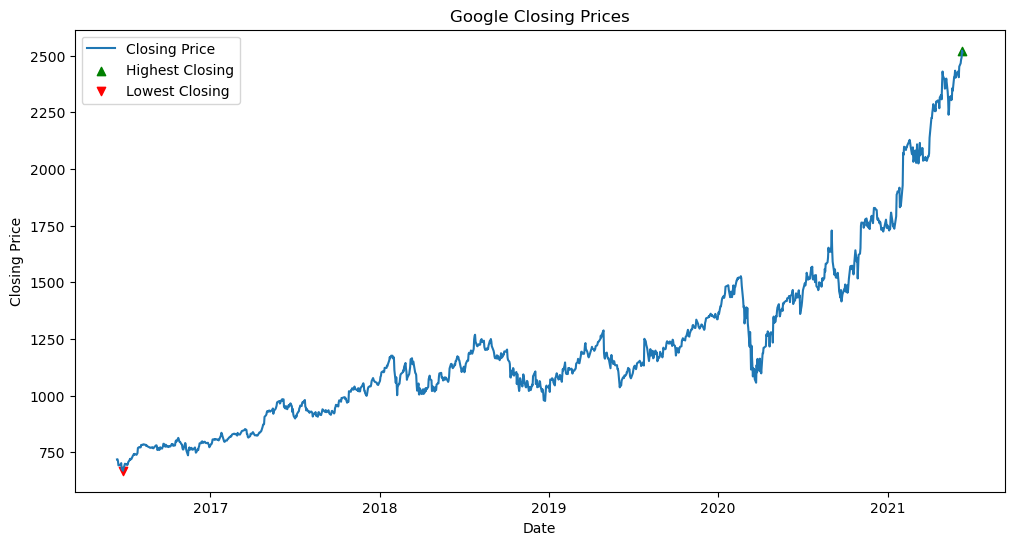

In [76]:
# Plot the historical closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Closing Price')
plt.scatter(max_close_day, df.loc[df['close'].idxmax()]['close'], color='green', label='Highest Closing', marker='^')
plt.scatter(min_close_day, df.loc[df['close'].idxmin()]['close'], color='red', label='Lowest Closing', marker='v')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Google Closing Prices')
plt.legend()
plt.show()

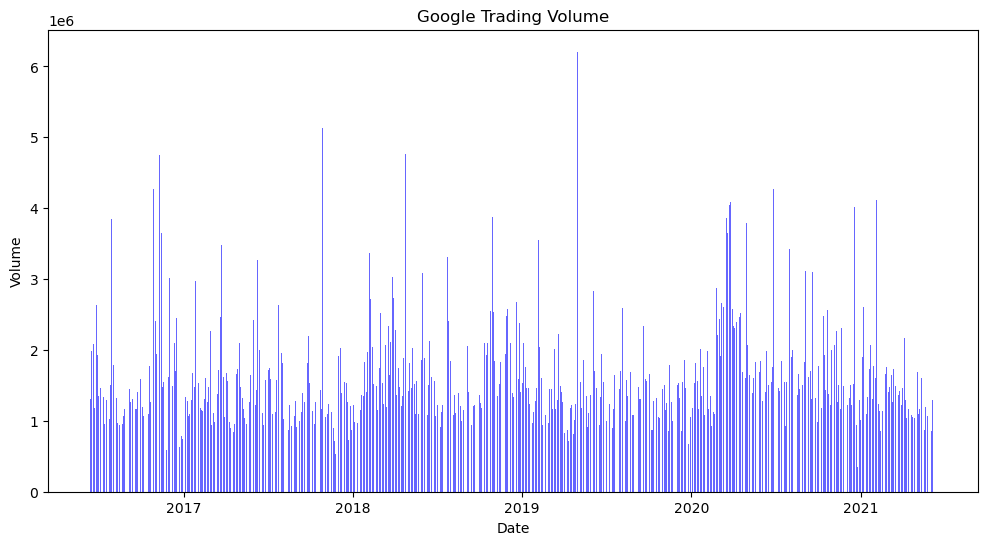

In [77]:
# Plot the trading volume over time
plt.figure(figsize=(12, 6))
plt.bar(df['date'], df['volume'], color='blue', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Google Trading Volume')
plt.show()

In [78]:
# Extend the dataset to simulate future predictions (e.g., 30 days beyond the available data)
extended_dates = pd.date_range(start=df['date'].max(), periods=30, freq='D')
extended_dates = pd.DataFrame({'date': extended_dates})
extended_df = pd.concat([df, extended_dates], ignore_index=True)

In [79]:
# Preprocess the extended dataset for prediction
extended_dataset = scaler.transform(extended_df[['close']].values.astype(float))
X_extended, y_extended = create_sequences(extended_dataset, look_back)
X_extended = np.reshape(X_extended, (X_extended.shape[0], X_extended.shape[1], 1))

In [80]:
# Generate predictions for the extended dataset
extended_predict = model.predict(X_extended)
extended_predict = scaler.inverse_transform(extended_predict)

40/40 [==============================] - 0s 4ms/step


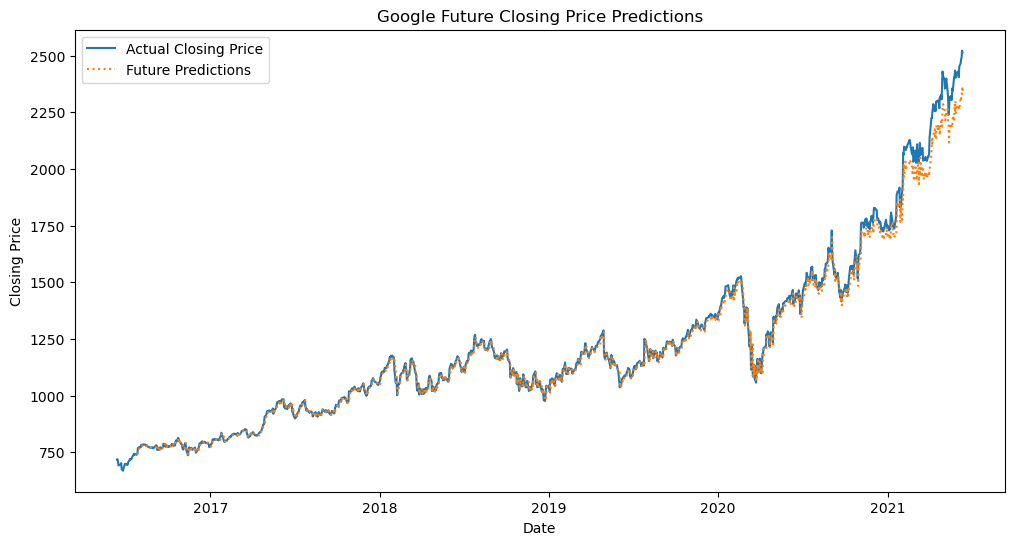

In [81]:
# Plot the actual data and future predictions
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Actual Closing Price')
plt.plot(extended_df.iloc[look_back:]['date'], extended_predict, label='Future Predictions', linestyle='dotted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Google Future Closing Price Predictions')
plt.legend()
plt.show()

In [82]:
# Filter the data for the year 2020
df_2020 = df[df['date'].dt.year == 2020]

# Create a DataFrame for actual and predicted closing prices in 2020
dates_2020 = df_2020['date'][look_back + 1:].reset_index(drop=True)  # Adjusted indexing
actual_prices_2020 = df_2020['close'][look_back:-1].reset_index(drop=True)  # Adjusted indexing
predicted_prices_2020 = extended_predict[-len(dates_2020):].flatten()  # Flattening the predicted prices array

closing_prices_2020_df = pd.DataFrame({'Date': dates_2020, 'Actual': actual_prices_2020, 'Predicted': predicted_prices_2020})

# Display the actual and predicted closing prices for the year 2020 in a tabular form
print(closing_prices_2020_df)

                         Date   Actual    Predicted
0   2020-02-18 00:00:00+00:00  1520.74  1572.786987
1   2020-02-19 00:00:00+00:00  1519.67  1506.266113
2   2020-02-20 00:00:00+00:00  1526.69  1546.390381
3   2020-02-21 00:00:00+00:00  1518.15  1508.223022
4   2020-02-24 00:00:00+00:00  1485.11  1510.152832
..                        ...      ...          ...
217 2020-12-24 00:00:00+00:00  1732.38          NaN
218 2020-12-28 00:00:00+00:00  1738.85          NaN
219 2020-12-29 00:00:00+00:00  1776.09          NaN
220 2020-12-30 00:00:00+00:00  1758.72          NaN
221 2020-12-31 00:00:00+00:00  1739.52          NaN

[222 rows x 3 columns]


In [83]:
# Calculate the 50-day and 200-day moving averages
df['MA_50'] = df['close'].rolling(window=50).mean()
df['MA_200'] = df['close'].rolling(window=200).mean()

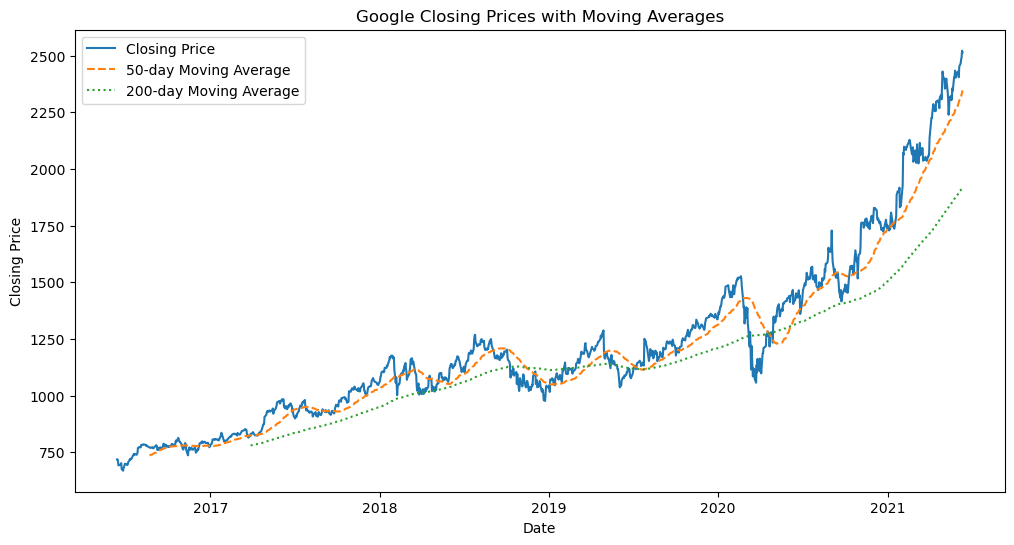

In [84]:
# Plot the moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Closing Price')
plt.plot(df['date'], df['MA_50'], label='50-day Moving Average', linestyle='dashed')
plt.plot(df['date'], df['MA_200'], label='200-day Moving Average', linestyle='dotted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Google Closing Prices with Moving Averages')
plt.legend()
plt.show()